In [1]:
import numpy as np
import struct
from scipy.stats import norm, lognorm
import os
from sklearn.model_selection import train_test_split
from sklearn import datasets
import argparse
import os
import sys
import pdb
import joblib
from sklearn.metrics import classification_report

In [2]:
dd=np.loadtxt('../train_data_try/training.csv')

In [3]:
len(dd)

5773193

In [4]:
X = dd[:,:-1]
y = dd[:,-1]

In [5]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True,
                                                     random_state=1)

In [10]:
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor
#reg = LinearRegression().fit(X, y)
#reg = linear_model.Ridge(alpha=0.1).fit(X,y)
#reg = linear_model.Lasso(alpha=0.1).fit(X,y)
#reg = linear_model.LassoLars(alpha=.1).fit(X,y)
reg = DecisionTreeRegressor(random_state=0,max_depth=5).fit(X,y)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X_test)
#for i in range(len(y_pred)):
    #print(str(y_pred[i])+"   "+str(y_test[i]))
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


[Text(167.4, 190.26, 'X[5] <= 2.5\nmse = 0.551\nsamples = 5773193\nvalue = 0.673'),
 Text(83.7, 135.9, 'X[5] <= 1.5\nmse = 0.012\nsamples = 4329893\nvalue = 0.263'),
 Text(41.85, 81.53999999999999, 'X[2] <= 0.237\nmse = 0.009\nsamples = 2886593\nvalue = 0.215'),
 Text(20.925, 27.180000000000007, 'mse = 0.004\nsamples = 749569\nvalue = 0.088'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 0.003\nsamples = 2137024\nvalue = 0.259'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 14.5\nmse = 0.005\nsamples = 1443300\nvalue = 0.361'),
 Text(104.625, 27.180000000000007, 'mse = 0.001\nsamples = 1073722\nvalue = 0.324'),
 Text(146.475, 27.180000000000007, 'mse = 0.002\nsamples = 369578\nvalue = 0.467'),
 Text(251.10000000000002, 135.9, 'X[4] <= 1.5\nmse = 0.157\nsamples = 1443300\nvalue = 1.901'),
 Text(209.25, 81.53999999999999, 'X[2] <= 0.0\nmse = 0.003\nsamples = 1356042\nvalue = 1.999'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 0.116\nsamples = 10833\nvalue = 1.7

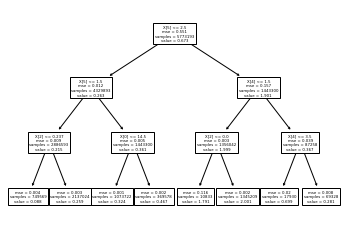

In [8]:
from sklearn import tree
tree.plot_tree(reg)  

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix( X_test, label=y_test)
#1.训练模型
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.2
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4

watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 150
bst = xgb.train(param, xg_train, num_round, watchlist );

pred = bst.predict( xg_test );

print(classification_report(y_test, pred)) 



[11:35:07] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:35:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.10356	test-mlogloss:1.10379
[1]	train-mlogloss:0.91713	test-mlogloss:0.91763
[2]	train-mlogloss:0.78289	test-mlogloss:0.78384
[3]	train-mlogloss:0.68220	test-mlogloss:0.68294
[4]	train-mlogloss:0.60428	test-mlogloss:0.60526
[5]	train-mlogloss:0.54320	test-mlogloss:0.54434
[6]	train-mlogloss:0.49493	test-mlogloss:0.49591
[7]	train-mlogloss:0.45599	test-mlogloss:0.45720
[8]	train-mlogloss:0.42464	tes

[152]	train-mlogloss:0.25857	test-mlogloss:0.26837
[153]	train-mlogloss:0.25851	test-mlogloss:0.26837
[154]	train-mlogloss:0.25840	test-mlogloss:0.26839
[155]	train-mlogloss:0.25833	test-mlogloss:0.26839
[156]	train-mlogloss:0.25825	test-mlogloss:0.26837
[157]	train-mlogloss:0.25818	test-mlogloss:0.26840
[158]	train-mlogloss:0.25811	test-mlogloss:0.26842
[159]	train-mlogloss:0.25810	test-mlogloss:0.26841
[160]	train-mlogloss:0.25807	test-mlogloss:0.26842
[161]	train-mlogloss:0.25804	test-mlogloss:0.26842
[162]	train-mlogloss:0.25800	test-mlogloss:0.26843
[163]	train-mlogloss:0.25796	test-mlogloss:0.26844
[164]	train-mlogloss:0.25792	test-mlogloss:0.26845
[165]	train-mlogloss:0.25788	test-mlogloss:0.26845
[166]	train-mlogloss:0.25783	test-mlogloss:0.26846
[167]	train-mlogloss:0.25783	test-mlogloss:0.26846
[168]	train-mlogloss:0.25782	test-mlogloss:0.26846
[169]	train-mlogloss:0.25782	test-mlogloss:0.26846
[170]	train-mlogloss:0.25782	test-mlogloss:0.26846
[171]	train-mlogloss:0.25782	te

In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(50,50), max_iter=200, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  

print(classification_report(y_test, y_pred)) 

KeyboardInterrupt: 